<br> <font size=7 color=#009999> <b> Tâche 8 - Electronic bands </b> <br><br>

<font size=6 color=#009999> <br> Imports <br> <br>

In [1]:
from pymatgen.core import Lattice, Structure, Molecule
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
from matplotlib import pyplot as plt 
import numpy as np

<font size=6 color=#009999> <br> Téléchargement du fichier CIF du matériau mp-867168 ($Sr_2SbAu$) <br> <br>

In [2]:
with MPRester("V4zgRFcb4T97MTrH") as m:
    structure = m.get_structure_by_material_id("mp-867168")
    band = m.get_bandstructure_by_material_id("mp-867168")

<font size=6 color=#009999> <br> Bandes électroniques <br> <br>

<font size=5 color=#009999> <br> 1. Structure de bandes <br> <br>

Le graphe suivant illustre la structure de bande du $Sr_2SbAu$ en fonction des vecteurs d'onde de la zone de Brillouin. Les distances entre les différents points de la zone de Brillouin sont données en dessous.

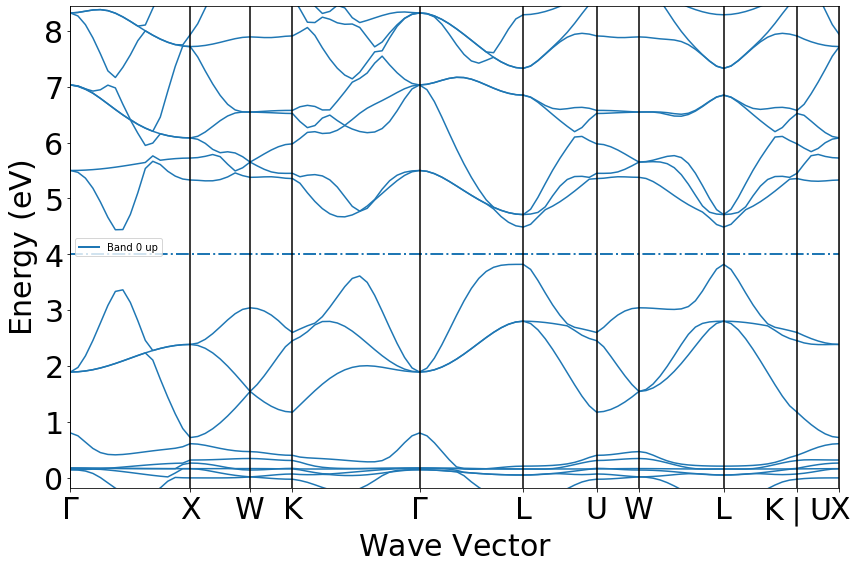

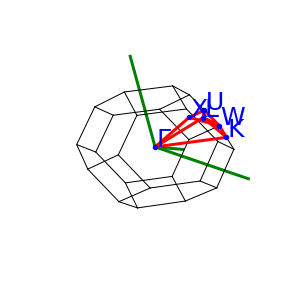

In [3]:
plot = BSPlotter(band)
plot.get_plot(zero_to_efermi=False)
plot.plot_brillouin()

In [4]:
data = plot.bs_plot_data()
nb_bands = band.nb_bands

ticks = data.get("ticks")
distance = ticks.get("distance")
label = ticks.get("label")

energy = data.get('energy').get("1")
distances = data.get('distances')
vbm = data.get("vbm")
cbm = data.get("cbm")
band_gap = data.get("band_gap")
is_metal = data.get("is_metal")
zero_energy = data.get("zero_energy")

print("Distances des points sur la zone de Brillouin")
print("-----------------------")
for i in range(len(distance)):
    if ticks.get("label")[i] == "$\Gamma$" :
        ticks.get("label")[i] = "\u0393"
    print(label[i], " : ", distance[i])
    print("-----------------------")
print("Ce matériau possède ", nb_bands, " bandes d'énergies.")
print("Le niveau de Fermi se trouve à ", zero_energy, " eV")

Distances des points sur la zone de Brillouin
-----------------------
Γ  :  0.0
-----------------------
X  :  0.7916975025004689
-----------------------
X  :  0.7916975025004689
-----------------------
W  :  1.1875462537507033
-----------------------
W  :  1.1875462537507033
-----------------------
K  :  1.4674535900839707
-----------------------
K  :  1.4674535900839707
-----------------------
Γ  :  2.307175599083786
-----------------------
Γ  :  2.307175599083786
-----------------------
L  :  2.992805748361887
-----------------------
L  :  2.992805748361887
-----------------------
U  :  3.477619476302376
-----------------------
U  :  3.477619476302376
-----------------------
W  :  3.7575268126356436
-----------------------
W  :  3.7575268126356436
-----------------------
L  :  4.31734148530218
-----------------------
L  :  4.31734148530218
-----------------------
K$\mid$U  :  4.802155213242667
-----------------------
X  :  5.082062549575943
-----------------------
Ce matériau possède

<font size=5 color=#009999> <br> 2. Bande interdite <br> <br>

La bande interdite est une région de la structure de bandes dans laquelle aucune énergie n'est permise, elle est indiquée en rouge dans le graphe ci-dessous.

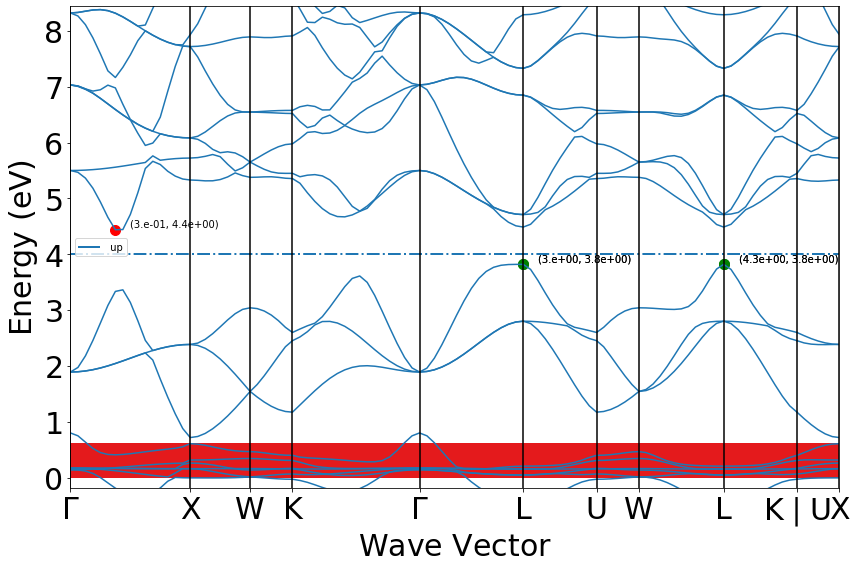

Ce matériau est un métal :  False
Informations relatives à la bande interdite :  Indirect L-(0.188,-0.000,0.188) bandgap = 0.6199999999999997


In [5]:
graph = plot.get_plot(vbm_cbm_marker=True,bs_labels=[""], zero_to_efermi=False)
graph.fill_between(np.linspace(distance[0],distance[-1],500),vbm[0][1],cbm[0][1])
for i in range(len(cbm)):
    graph.text(cbm[i][0]+0.1,cbm[i][1]+zero_energy+0.05, "("+np.format_float_scientific(cbm[i][0], precision=1) + ", " + np.format_float_scientific(cbm[i][1]+zero_energy,precision=1)+ ")")
for i in range(len(vbm)):
    graph.text(vbm[i][0]+0.1,vbm[i][1]+zero_energy+0.05, "("+np.format_float_scientific(vbm[i][0], precision=1) + ", " + np.format_float_scientific(vbm[i][1]+zero_energy,precision=1)+ ")")
graph.show()
print("Ce matériau est un métal : ", is_metal)
print("Informations relatives à la bande interdite : ", band_gap)

On voit sur ce graphe que la bande interdite est indirecte. Puisque le minima de la bande de conduction est à une énergie de $0.62 eV$ par rapport au niveau de Fermi (c'est à dire à $4.4 eV$), et que les minimas de la bande de valence sont à $0eV$ par rapport au niveau de Fermi (c'est à dire à $3.8 eV$), on calcule que la bande interdite a une largeur de $0.62eV$. Cette valeur est non-négligeable ce qui implique que le $Sr_2SbAu$ n'est pas un métal.

<font size=5 color=#009999> <br> 3. Bande de valence <br> <br>

La direction dans laquelle la dernière bande de valence possède le plus/le moins de dispersion est celle avec la pente la plus/la moins forte.

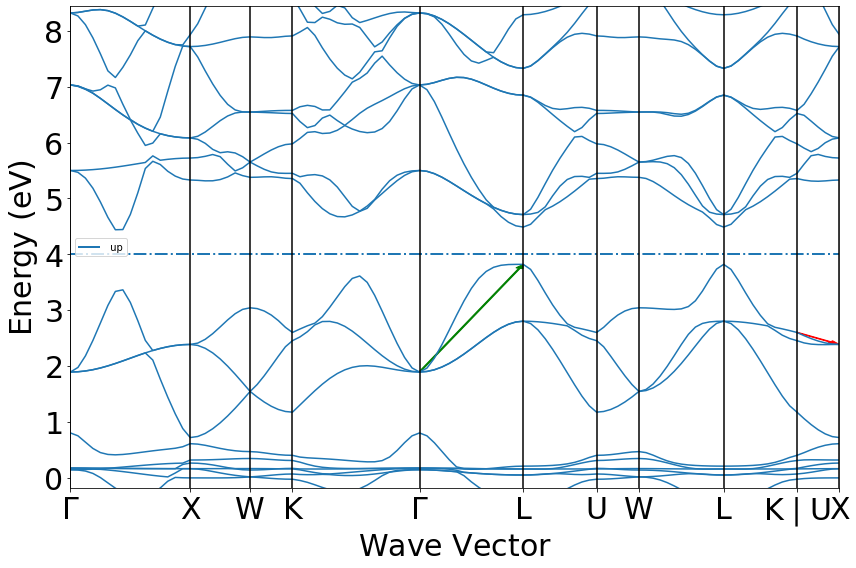

In [6]:
for i in range(len(energy)):
    for j in range(len(energy[i])):
        if 0 in energy[i][j]: 
            valence_band_number = j
           
min_dis = np.Inf
max_dis = 0
distance = np.unique(distance)

for i in range(len(energy)):
    energy_difference = np.abs(energy[i][valence_band_number][-1]-energy[i][valence_band_number][0])
    if energy_difference < min_dis : 
        min_dis = energy_difference
        start_min_dis = i
    if energy_difference > max_dis : 
        max_dis = energy_difference
        start_max_dis = i
plot.get_plot(zero_to_efermi=False, bs_labels=[""])
plt.arrow(distance[start_min_dis],energy[start_min_dis][valence_band_number][0]+zero_energy,distance[start_min_dis+1] - distance[start_min_dis],-min_dis, length_includes_head=True, color="red", width=0.01, head_width=0.05)
plt.arrow(distance[start_max_dis],energy[start_max_dis][valence_band_number][0]+zero_energy,distance[start_max_dis+1] - distance[start_max_dis],max_dis, length_includes_head=True, color="green", width=0.01, head_width=0.05)

On voit sur ce schéma que la direction avec la plus grande dispersion est entre $\Gamma$ et $L$ (flèche verte), alors que la direction avec la plus petite dispersion est entre $U$ et $X$ (flèche rouge).

<font size=5 color=#009999> <br> 4. Bande de conduction <br> <br>

De même que pour la bande de valence, la direction dans laquelle la dernière bande de conduction possède le plus/le moins de dispersion est celle avec la pente la plus/la moins forte.

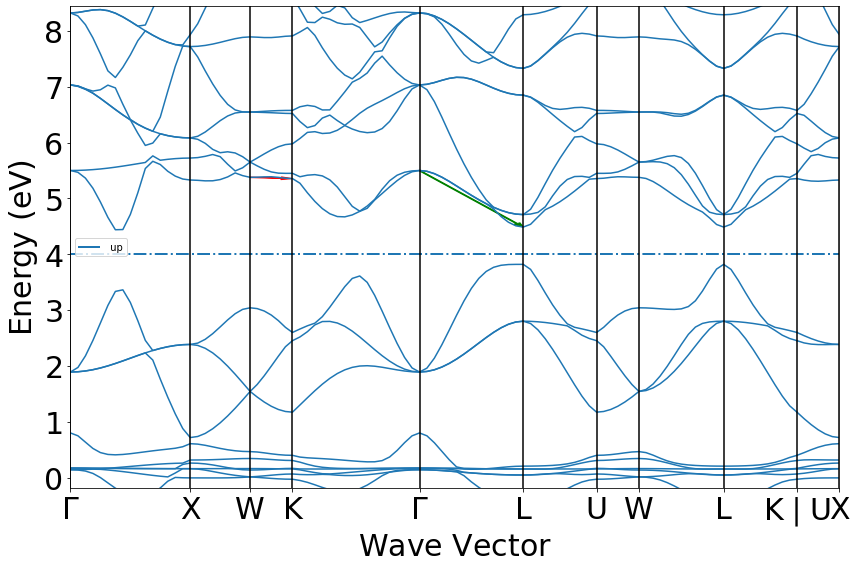

In [7]:
conduction_band_number = valence_band_number + 1
           
min_dis = np.Inf
max_dis = 0

for i in range(len(energy)):
    energy_difference = np.abs(energy[i][conduction_band_number][-1]-energy[i][conduction_band_number][0])
    if energy_difference < min_dis : 
        min_dis = energy_difference
        start_min_dis = i
    if energy_difference > max_dis : 
        max_dis = energy_difference
        start_max_dis = i
plot.get_plot(zero_to_efermi=False, bs_labels=[""])
plt.arrow(distance[start_min_dis],energy[start_min_dis][conduction_band_number][0]+zero_energy,distance[start_min_dis+1] - distance[start_min_dis],-min_dis, length_includes_head=True, color="red", width=0.01, head_width=0.05)
plt.arrow(distance[start_max_dis],energy[start_max_dis][conduction_band_number][0]+zero_energy,distance[start_max_dis+1] - distance[start_max_dis],-max_dis, length_includes_head=True, color="green", width=0.01, head_width=0.05)

On voit sur ce schéma que la direction avec la plus grande dispersion est entre $\Gamma$ et $L$ (flèche verte), alors que la direction avec la plus petite dispersion est entre $W$ et $K$ (flèche rouge).

<font size=5 color=#009999> <br> 5. Masse effective <br> <br>

La masse effective est défini par le tenseur d'ordre 2 de l'énergie par rapport au vecteur d'onde $k$ : $m_{ij}^* = \Big(\frac{\partial^2 E}{\partial k_i \partial k_j}\Big)^{-1}$. Dans ce cas ci, l'équation se simplifie en $m^* = \big(\frac{\partial^2E}{\partial k^2}\big)^{-1}$. 


In [8]:
energy_valence_band = []
energy_conduction_band = []
k_distances = []


for i in range(len(energy)):
    for j in range(len(energy[i])):
        if j == valence_band_number: 
            for k in range(len(energy[i][j])):
                energy_valence_band.append(energy[i][j][k]+zero_energy)
        if j == conduction_band_number: 
            for k in range(len(energy[i][j])):
                energy_conduction_band.append(energy[i][j][k]+zero_energy)
for i in range(len(distances)):
    for j in range(len(distances[i])):
        k_distances.append(distances[i][j])

<font size=3 color=#009999> <br> 5.1 Bande de valence <br> <br>

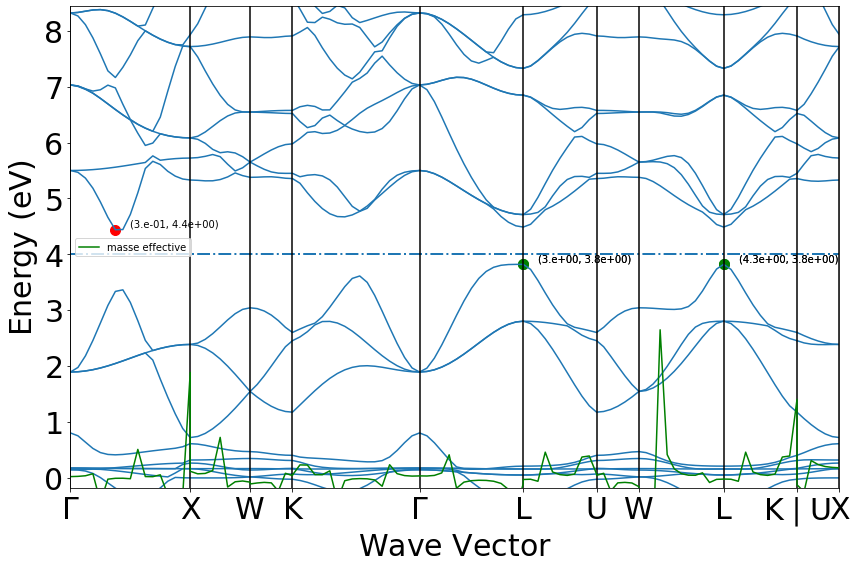

In [9]:
first_derivative = np.gradient(energy_valence_band, k_distances[1]-k_distances[0],edge_order=2)
second_derivative = np.gradient(first_derivative, k_distances[1]-k_distances[0], edge_order=2)
effective_mass = 1/second_derivative

plot.get_plot(vbm_cbm_marker=True, bs_labels=["bandes d'énergies"], zero_to_efermi=False)
plt.plot(k_distances,effective_mass, color="green", label="masse effective")
for i in range(len(cbm)):
    graph.text(cbm[i][0]+0.1,cbm[i][1]+zero_energy+0.05, "("+np.format_float_scientific(cbm[i][0], precision=1) + ", " + np.format_float_scientific(cbm[i][1]+zero_energy,precision=1)+ ")")
for i in range(len(vbm)):
    graph.text(vbm[i][0]+0.1,vbm[i][1]+zero_energy+0.05, "("+np.format_float_scientific(vbm[i][0], precision=1) + ", " + np.format_float_scientific(vbm[i][1]+zero_energy,precision=1)+ ")")
plt.legend()

In [10]:
for i in range(len(k_distances)):
    if k_distances[i] == vbm[0][0]: 
        mass1 = effective_mass[i]
for i in range(len(k_distances)):
    if k_distances[i] == vbm[2][0]: 
        mass2 = effective_mass[i]
print("Masse effective en k = ", vbm[0][0], " : ", -mass1)
print("Masse effective en k = ", vbm[2][0], " : ", -mass2)

Masse effective en k =  2.992805748361887  :  0.03396987380037504
Masse effective en k =  4.31734148530218  :  0.026319577040172324


Ce graphe montre la masse effective (en vert) de la dernière bande de valence trouvée en prenant l'inverse de la dérivée seconde de la dernière bande de valence. Au sommet $(3,3.8)$, on obtient une masse effective de $m^*_{h^+} = 0.0339$ alors qu'au sommet $(4.3,3.8)$, on obtient une masse effective de $m^*_{h^+} = 0.0263$

<font size=3 color=#009999> <br> 5.1 Bande de valence <br> <br>

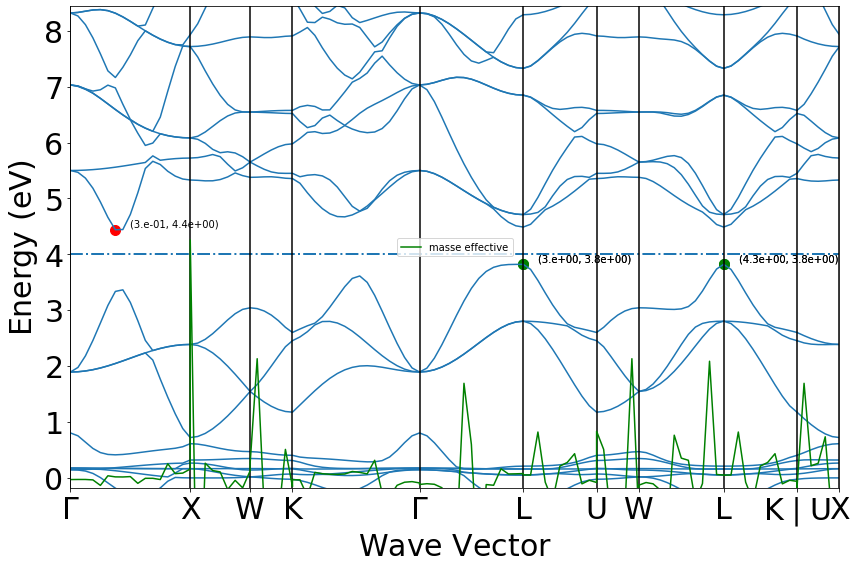

In [11]:
first_derivative = np.gradient(energy_conduction_band, k_distances[1]-k_distances[0],edge_order=2)
second_derivative = np.gradient(first_derivative, k_distances[1]-k_distances[0], edge_order=2)
effective_mass = 1/second_derivative

plot.get_plot(vbm_cbm_marker=True, bs_labels=["bandes d'énergies"], zero_to_efermi=False)
plt.plot(k_distances,effective_mass, color="green", label="masse effective")

for i in range(len(cbm)):
    graph.text(cbm[i][0]+0.1,cbm[i][1]+zero_energy+0.05, "("+np.format_float_scientific(cbm[i][0], precision=1) + ", " + np.format_float_scientific(cbm[i][1]+zero_energy,precision=1)+ ")")
for i in range(len(vbm)):
    graph.text(vbm[i][0]+0.1,vbm[i][1]+zero_energy+0.05, "("+np.format_float_scientific(vbm[i][0], precision=1) + ", " + np.format_float_scientific(vbm[i][1]+zero_energy,precision=1)+ ")")
plt.legend()

In [12]:
for i in range(len(k_distances)):
    if k_distances[i] == cbm[0][0]: 
        mass1 = effective_mass[i]
print("Masse effective en k = ", cbm[0][0], " : ", mass1)

Masse effective en k =  0.29688656343767583  :  0.012699059409554096


Ce graphe montre la masse effective (en vert) de la première bande de conduction trouvée en prenant l'inverse de la dérivée seconde de la dernière bande de conduction. A la base $(0.3,4.4)$, on obtient une masse effective de $m^*_{e^-} = 0.0127$.